# Курс Data Science
## 16.3 Домашнее задание


### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new-value}-\text{old-value}}{\text{old-value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff', 'sms_diff', 'traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и `traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


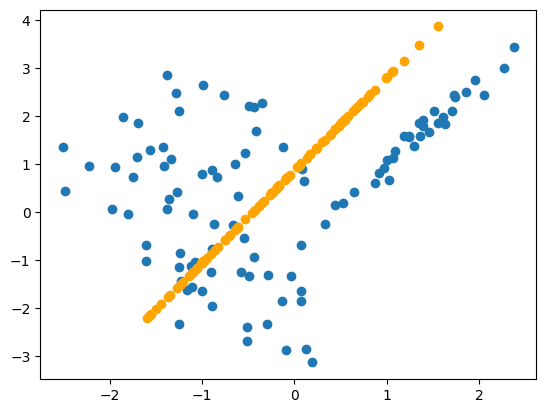

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X[:,[0,2]])

X_pca = pca.transform(X[:,[0,2]])
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:,0], X[:,2])
plt.plot(X_new[:,0], X_new[:,1], 'o', c='orange')
plt.show()

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.


С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные.

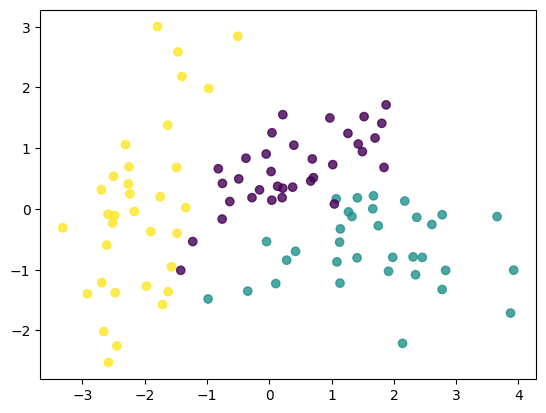

In [96]:
pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, marker='o', alpha=0.8)
plt.show()

В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.